# Data exploration of Neuropixels data
#### starting from a pseudo- or real NWB file with spike times and stimulus times. 
- The NWB format is based on HDF5, and it is maintained by a consortium of developers and scientists. 
- The format of these files is a sort of early, pseduo-NWB that followed a previous but now deprecated format. in lieu of updating the format to the current standard, it can be worked with as an hdf5 file with h5py. you can peruse the contents easily using hdfview. 

In [2]:
import h5py, os

In [7]:
experiment_path='/Volumes/DATA3/temporal/nwbs/'
filename = 'M310008_08-23-22_v1_angled1_d2.nwb'
nwb_data = h5py.File(os.path.join(experiment_path,filename))
probe = 'V1'

#### what's in this file? 
hdf5 files are heirarchies; each level has a name. here are the levels at the top of the file:

In [13]:
print(nwb_data.keys())

<KeysViewHDF5 ['acquisition', 'analysis', 'epochs', 'file_create_date', 'general', 'identifier', 'nwb_version', 'processing', 'session_description', 'session_start_time', 'stimulus']>


<br>you'll mostly want to check in 
- 'processing', where the "processed" spike time data is
- 'stimulus', where the information about visual stimuli (in this case) is

In [15]:
print(nwb_data['processing'].keys())

<KeysViewHDF5 ['V1']>


In [17]:
print(nwb_data['processing']['V1']['UnitTimes'].keys())

<KeysViewHDF5 ['117', '12', '133', '180', '183', '190', '204', '213', '229', '234', '250', '261', '262', '263', '266', '268', '270', '271', '272', '275', '276', '277', '278', '279', '280', '57', '6', '70', '71', '77', '94', 'unit_list']>


In [18]:
print(nwb_data['stimulus']['presentation'].keys())

<KeysViewHDF5 ['binary_UV', 'binary_green', 'flicker', 'natural movie: TOE1', 'natural_scenes', 'spontaneous epoch 1']>


### you can use the stimulus information, including the time of stimuli, to select spike times from each unit and do some analysis. 
to do so, we'll need our standard python tools, numpy and matplotlib

In [19]:
import numpy as np

In [50]:
unit = '94'
spike_times = np.array(nwb_data['processing']['V1']['UnitTimes'][unit]['times'])
print('Average firing rate of '+unit+' was '+\
       str(len(spike_times) / (spike_times[-1] - spike_times[0]))+' spikes / seconds')

Average firing rate of 94 was 1.101961870845712 spikes / seconds


In [46]:
import matplotlib.pyplot as plt

(2000, 2060)

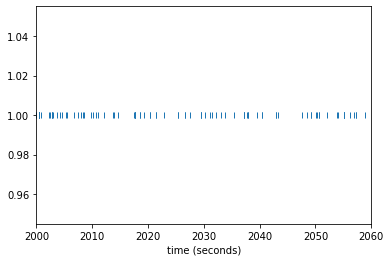

In [51]:
plt.plot(spike_times,np.ones(len(spike_times)),'|')
plt.xlabel('time (seconds)')
plt.xlim(2000,2060)

### you can also find many useful function in [dlab](http://www.github.com/denmanlab/dlab), which is dan's code base from the past few years. some examples of using the parts of dlab are below. 
<br>(one note is that most of this code was written for python 2.7, so it may need some updating here or there. you are welcome to modify (or add!) and make pull requests)
<br>(another note: this is "experimental" code that has not been packaged for distribution. if there are confusing dependencies that  )

In [32]:
from dlab import psth_and_raster as psth

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe87cb06a10>)

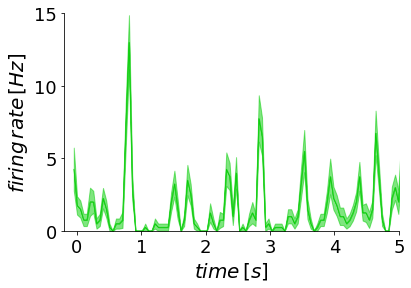

<Figure size 432x288 with 0 Axes>

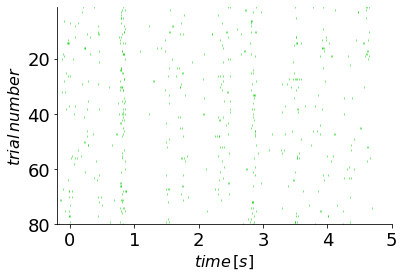

In [56]:
stimulus_times = nwb_data['stimulus']['presentation']['natural_scenes']['timestamps'][::118] #there are 118 images. that is why we align to the start of the sequence, which is every 118th timestamp
psth.psth_line(spike_times,stimulus_times,pre=0.2,post=5.,ymax=15)
plt.figure()
psth.raster(spike_times,stimulus_times,timeDomain=True,pre=0.2,post=5.)

in the above plots, you can see discrete response events by this neuron, to repeated presentations of the same set of images. what is the reliability - how reproducible a spike train is over trials, at the msec level

In [57]:
from dlab import reliability_and_precision as rp

In [62]:
rp.reliability(spike_times,stimulus_times,binsize=0.001,post = 12) # single millisecond reliability

0.3296527641081165

.33% of the spikes show up at exactly the same millisecond over trials. not 33%, .33%. this is not uncommon! (you could make a distribution of reliability for all the neurons in this recording). this is a measure that is also the basis of information theory quantifications of visual information in a response. 

there are other parts of dlab, including a new and growing population analysis for the data we typically have. explore and add!